In [1]:
from astropy.io import fits as astro_fits  
from astropy.io.fits import getdata

import copy
import glob

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable 
import matplotlib as mpl 
from matplotlib.collections import LineCollection


import numpy as np
from IPython.display import HTML

import astropy.table
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.visualization import AsymmetricPercentileInterval, ImageNormalize, LogStretch 

#These packages are for Using TrackPy
import matplotlib.pyplot as plt 
import pandas as pd
from pandas import DataFrame, Series  # for convenience
import pims
import trackpy as tp 
from numpy import sqrt  

In [2]:
List_2 = glob.glob(r'C:\Users\14242\2022 Summer Internship\Sun Pics Part 2 (10 pics)\*')

In [53]:
data_average = [] #Averages subtracted data
data_median = [] #Median subtracted data
for Polar in List_2: 
    Polardata = getdata(Polar) 
    data_average.append(Polardata - np.average(Polardata)) 
    data_median.append(Polardata - np.median(Polardata))  
    
Arr=np.array(data_average)#Converts Arr list into numpy array

In [5]:
#For this I want to know how to create a loop for the difference
#Diff = Arr[2] - Arr[1]

In [58]:

Diff = [] #Consequtive Differences
for i in range (1,len(Arr)-1): 
    Diff.append(Arr[i+1]-Arr[i]) 
    
Diff = np.array(Diff)

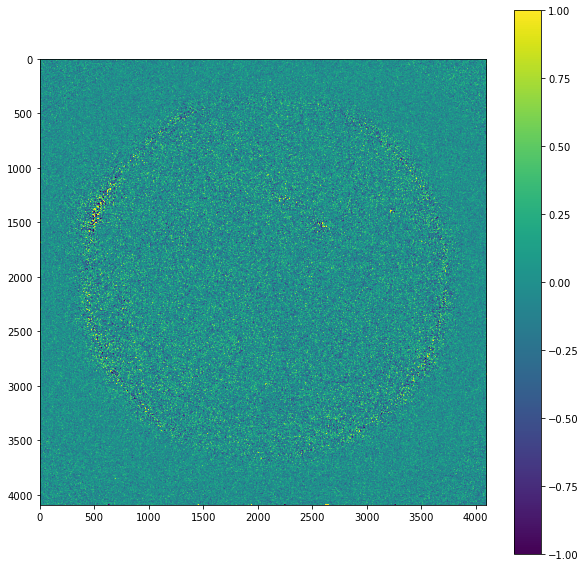

In [59]:
#Just a plot for the Difference from the start

plt.figure(figsize=(10,10))
plt.imshow(Diff[0],vmin = -1, vmax = 1)  
plt.colorbar()
plt.show()

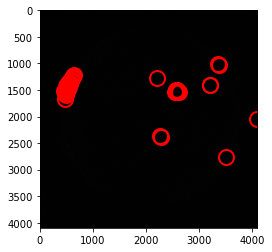

In [62]:
#Use trackpy to locate Gaussian-like blobs of some image
f = tp.locate(Arr[0], 11, invert = True, minmass = 70) 

tp.annotate(f,Arr[0]);#Creates the graph of f 

In [64]:
#Find specific data for the one partical
#f.iloc[34]

In [65]:
#Tells us the frames and features of the photos 
r = tp.batch(Arr,11, minmass =50); 


Frame 9: 172 features


In [66]:
# The 5 here is the max displacement that the partical can travel 
#This tends to be small so it dosnet slow down the program  
#Memeory means the amount of frames that the partical can be missed 
#this is useful to give us the partical within the header
t = tp.link(r,5,memory = 9)

Frame 9: 172 trajectories present.


In [67]:
t.head 

<bound method NDFrame.head of                 y            x         mass      size       ecc      signal  \
0      529.962500  1365.025000    60.341622  2.843853  0.408534    3.017081   
88    2388.872820  2273.924419  1037.875892  1.364255  0.199230  191.584649   
87    2383.250000   477.027778    54.307459  3.345810  0.583462    2.262811   
86    2371.485232  2272.649789   178.762054  2.624937  0.483307   11.314054   
85    2358.050633  2137.126582    59.587351  1.909337  0.349237    4.525622   
...           ...          ...          ...       ...       ...         ...   
1825  1443.455882   491.573529    66.059300  2.589572  0.364086    3.885841   
1826  1446.737762   533.937063   277.837645  3.006403  0.327456   10.200333   
1827  1458.042579   529.597324   399.270182  2.930667  0.302865   13.600444   
1819  1410.416459   547.246883   194.777790  2.679468  0.180944   10.200333   
1938  3612.679688  2341.546875    62.173459  2.052057  0.161423    3.885841   

         raw_mass    

In [69]:
t1 = tp.filter_stubs(t,5) #Filters out Spurious traj 
print('Before:', t['particle'].nunique())
print('After:', t1['particle'].nunique())

Before: 677
After: 139


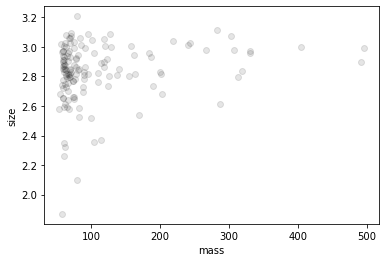

In [70]:
plt.figure()
tp.mass_size(t1.groupby('particle').mean());

plt.figure()
tp.mass_size(t1.groupby('particle').mean());

In [72]:
#This cell will be for the code to filter out the particals that are not needed 
t2 = t1[((t1['mass'] <400 ) & (t1['size'] > 2.2) &
         (t1['ecc'] < 1))]

In [71]:
#Variable of original radius of the sun. 
R = 1625.691406

In [73]:
#This is a equation for the radius of the particals INSIDE of the Circle 
iloc_valid = []

for i in range(len(t)): #I changed f into t 
    r = np.sqrt((t2['x'].iloc[i]- 2070.828369)**2 + (t2['y'].iloc[i] - 2008.760620)**2)
    if r<R: 
        print(r, t2['particle'].iloc[i])
        iloc_valid.append(i)
    else: 
        print ('N/A')
         

    

N/A
1310.0122946769181 7
1324.6344228800185 8
1532.5956079959215 10
N/A
1615.8715442070736 12
N/A
N/A
N/A
617.4255229141545 17
641.7165331263342 18
676.6424513546959 19
N/A
665.1199739983867 21
N/A
678.9327322113858 26
1611.3514018291044 27
1624.9308009123406 28
1610.2995676914966 29
1581.6142906210787 30
1500.1226583981406 34
1518.756939135953 37
N/A
N/A
1075.8818865783487 41
N/A
931.8096551189237 43
1404.4740548524371 44
1475.088802907278 47
N/A
N/A
1526.3008050326814 52
1595.112149410915 57
N/A
726.7895786043396 59
1518.312543059864 60
721.0605359060778 61
N/A
N/A
N/A
727.5878124236253 67
N/A
745.8407260546937 69
1229.7609188872839 70
1256.9238436833666 72
N/A
N/A
N/A
N/A
1275.3616359869848 80
N/A
N/A
1231.9775560624546 85
N/A
1389.9183542681835 87
671.5308056060018 88
N/A
1305.273055955475 90
N/A
N/A
1289.1368190583771 93
691.058937136354 95
705.5000234656508 96
N/A
N/A
N/A
693.2468449219405 100
723.9700787135994 101
N/A
N/A
1502.1799472576909 105
1029.5350504943162 106
1293.093129

IndexError: single positional indexer is out-of-bounds

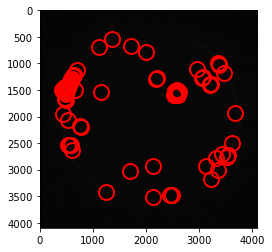

In [75]:
#pic of partical in t2
plt.figure()
tp.annotate(t2[t2['frame'] == 0], Arr[1]);

In [ ]:
#shows us the info on the particles inside of the circle
#t2.iloc[iloc_valid].head

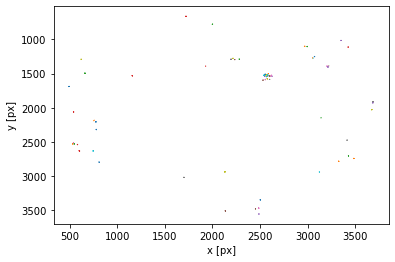

In [76]:
#takes into account ALL the Particals not the one we need
plt.figure()
tp.plot_traj(t2.iloc[iloc_valid]); 

In [78]:
#shows us the particle that are still valid
#print (*iloc_valid)

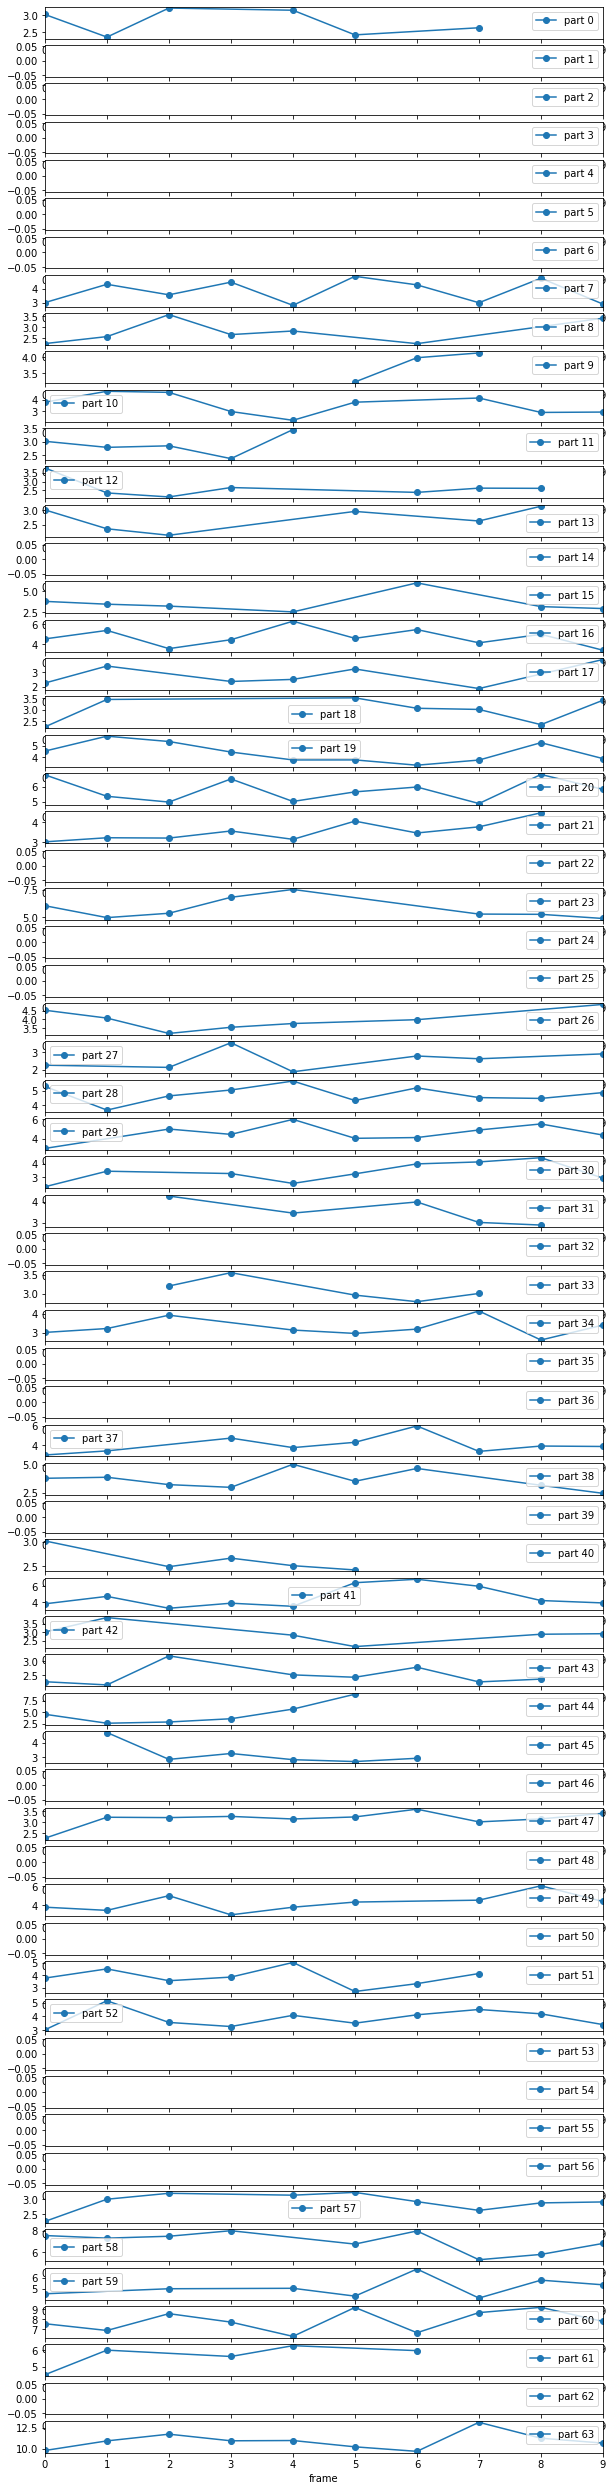

In [92]:
#Make Light curves 

Tot_part = len(t2.iloc[iloc_valid].particle.unique())#Total # of particles
Position = range(1,Tot_part+1) #Creates a Position Index for plots

fig = plt.figure(1,figsize = (10,45))
for p in range(Tot_part): 
    ax = fig.add_subplot(Tot_part, 1,Position[p])
    ax.set_xlim((0,9))
    t2.loc[t2.particle==p].plot(x='frame',y='signal', 
                               style = '-o',label =f'part {p}',ax=ax)
plt.show()

In [93]:
#Plotting One graph for the light curve 

Tot_part = len(t2.iloc[iloc_valid].particle.unique())#Total # of particles
Position = range(1,Tot_part+1) #Creates a Position Index for plots 

fig = plt.figure(1,figsize =(10,45)) 

for p in range (Tot_part): 
    ax = (Tot_part,Position[p])  
    ax.set_xlim((0,9)) 
    t2.loc[t2.particle==p].plot(x='frame',y='signal', 
                               style = '-o',label =f'part {p}',ax=ax)
plt.show()

AttributeError: 'tuple' object has no attribute 'set_xlim'

<Figure size 720x3240 with 0 Axes>